In [1]:
import numpy as np
import cv2
import random
from sklearn.cluster import KMeans

""""""
import itertools
"""For displaying images inside Jupyter Notebook"""
%matplotlib notebook
import matplotlib.pyplot as plt

"""For creating csv files"""
import csv

In [2]:
"""importing python files not in this directory"""
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

### The following code is from `dominant_color.py`
Uses k means to determine the dominate colors in an image. Displays the results in a color histogram and saves the
RGB values in a csv file.

In [60]:
# create csv file with results
file = open('output/palettes.csv', 'w') # 'b' flag needed for Python 2.7
writer = csv.writer(file)
writer.writerow(['image name', 'palette'])

20

In [4]:
# load image and convert from BGR to RBG
image_path = 'src_imgs/test2.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

<IPython.core.display.Javascript object>


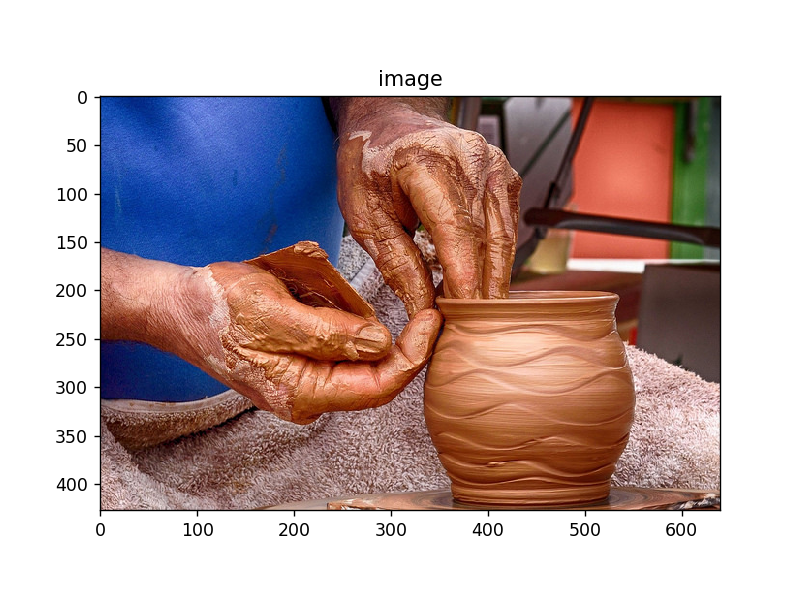

In [5]:
# TESTING: show our image
plt.figure()
plt.imshow(image)
plt.title('image')
plt.show()

In [9]:
# reshape image to a two dimension list of pixels
# the first dimension is each individual pixel while the
# second is the three color layers
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [10]:
# cluster the pixel intensities
"""The number of clusters to form as well as the number of centroids to generate."""
clt = KMeans(n_clusters= 6)
"""image : array-like or sparse matrix, shape=(n_samples, n_features)
Training instances to cluster."""
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
"""cluster_centers_ : array, [n_clusters, n_features] Coordinates of cluster centers

labels_ : Labels of each point

inertia_ : float

Sum of squared distances of samples to their closest cluster center."""

clt.cluster_centers_

array([[  44.91698039,   88.69231898,  184.05852442],
       [  80.67387866,   41.08587117,   26.29288558],
       [ 190.50203546,  123.50973516,  101.62187629],
       [ 139.75411876,   79.12357024,   53.37217983],
       [   8.83066415,   49.94885382,  128.14460669],
       [ 224.38828141,  180.35090873,  166.17410625]])

In [12]:
clt.labels_

array([4, 4, 0, ..., 3, 3, 1], dtype=int32)

In [18]:
# build histogram of clusters and create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)                # .utils in python file
bar = plot_colors(hist, clt.cluster_centers_) # .utils in python file

<IPython.core.display.Javascript object>


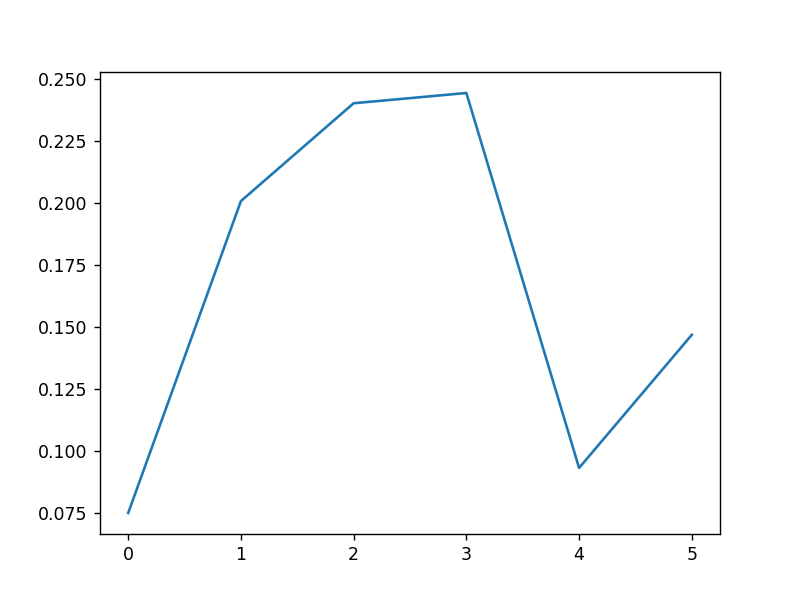

In [19]:
plt.figure()
plt.plot(hist)

In [20]:
# extract the RGB pixel values
# a tuple whose first element is the image path,
# and second element is an tuple of cluster centers given by bar
row = (image_path, [tuple(x) for x in bar])
row

('src_imgs/test2.jpg',
 [(array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([ 44,  88, 184], dtype=uint8),
   array([80, 41, 26], dtype=uint8),
   array([80, 41, 26], dtype=uint8),
   array([80, 41, 26], 

In [34]:
'''original'''
# make a list of lists containing the RGB values for all the colors in the histogram
palette = []
for arr in list(row[1][0]):
    # print([arr[0], arr[1], arr[2]])
    palette.append([arr[0], arr[1], arr[2]])
    
# remove duplicates in the color list
# print(lst_palette)
palette = list(palette for palette,_ in itertools.groupby(palette))
# print(lst_palette)
palette

In [46]:
'''improvement'''
# make a list of lists containing the RGB values for all the colors in the histogram
palette = [row[1][0]]

In [47]:
clt.cluster_centers_

array([[  44.91698039,   88.69231898,  184.05852442],
       [  80.67387866,   41.08587117,   26.29288558],
       [ 190.50203546,  123.50973516,  101.62187629],
       [ 139.75411876,   79.12357024,   53.37217983],
       [   8.83066415,   49.94885382,  128.14460669],
       [ 224.38828141,  180.35090873,  166.17410625]])

In [58]:
# print(lst_palette)
palette = clt.cluster_centers_.astype('int').tolist()
palette

[[44, 88, 184],
 [80, 41, 26],
 [190, 123, 101],
 [139, 79, 53],
 [8, 49, 128],
 [224, 180, 166]]

<IPython.core.display.Javascript object>


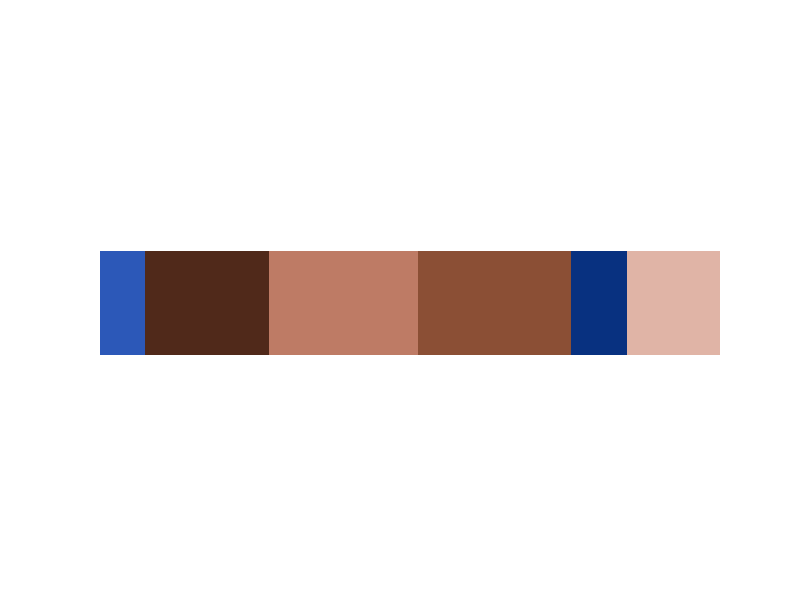

In [59]:
# show our color bar
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.savefig("output/result2.png")
plt.show()

In [61]:
# write rbg values into csv file
writer.writerow([row[0].encode('utf-8', 'ignore'), palette,])
'''Close the file'''
file.close()

### The following functions are from `utils.py`
functions defined here include:

`centroid_histogram(clt)`

`plot_colors(hist, centroids)`

In [14]:
def centroid_histogram(clt):
    """
    Grab the number of different clusters and create a histogram based 
    on the number of pixels assigned to each cluster

    Args:
        clt (sklearn.cluster.Kmeans): TODO
    Returns:
        hist (np.histogram): TODO
    """
#     numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
#     (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    '''The original method above creates a histogram by creating bins edge,
    an alternative to that would be the following'''
    (hist, _) = np.histogram(clt.labels_, bins=len(clt.cluster_centers_))

    '''normalize the histogram, such that it sums to one''' 
    # cast the whole hist array into float
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist

In [15]:
numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
numLabels

array([0, 1, 2, 3, 4, 5, 6])

In [16]:
np.histogram(clt.labels_, bins=numLabels)

(array([20481, 54850, 65628, 66758, 25448, 40115]),
 array([0, 1, 2, 3, 4, 5, 6]))

In [17]:
def plot_colors(hist, centroids):
    """
    Initialize the bar chart representing the relative frequency of each of the colors.

    Args:
        hist (np.histogram): TODO
    Returns:
        bar (np.arrary): TODO
    """
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

### The following functions are from `colorwheel.py`

functions defined here include:

`give_color(color)`

`get_complement(color)`

`complement_accents(color)`

In [ ]:
COLORWHEEL = {"red": (255, 0, 0), "rose": (255, 0, 128), "magenta": (255, 0, 255), "violet": (128, 0, 255),
              "blue": (0, 0, 255), "azure": (0, 128, 255), "cyan": (0, 255, 255),
              "spring green": (0, 255, 128), "green": (0, 255, 0), "chartreuse": (128, 255, 0), "yellow": (225, 255, 0),
              "orange": (255, 128, 0)}

In [ ]:
MIDRED = 0;WARMRED = 15;ORANGE = 30;WARMYELLOW = 45;MIDYELLOW = 60;COOLYELLOW = 75;YELLOWGREEN = 90;WARMGREEN = 105;
MIDGREEN = 120;COOLGREEN = 135;GREENCYAN = 150;WARMCYAN = 165;
MIDCYAN = 180;COOLCYAN = 195;BLUECYAN = 210;COOLBLUE = 225;MIDBLUE = 240;WARMBLUE = 255;VIOLET = 270;COOLMAGENTA = 285;MIDMAGENTA = 300;WARMMAGENTA = 315;REDMAGENTA = 330;COOLRED = 345

In [ ]:
COLORWHEEL_RANGE = {0: "MIDRED", 15: "WARMRED", 30: "ORANGE", 45: "WARMYELLOW", 60: "MIDYELLOW", 75: "COOLYELLOW",
                    90: "YELLOWGREEN", 105: "WARMGREEN", 120: "MIDGREEN", 135: "COOLGREEN", 150: "GREENCYAN",
                    165: "WARMCYAN", 180: "MIDCYAN", 195 : "COOLCYAN", 210: "BLUECYAN", 225: "COOLBLUE", 240: "MIDBLUE",
                    255 : "WARMBLUE",270 : "VIOLET", 285 : "COOLMAGENTA", 300 : "MIDMAGENTA", 315 : "WARMMAGENTA", 330 : "REDMAGENTA",
                    345 : "COOLRED"}
HVALS = dict((v,k) for k, v in COLORWHEEL_RANGE.iteritems())

In [ ]:
def give_color(color):
    """
    Returns string name of the color of the input h,s,v
    :param color: a hsv tuple
    :return: string corresponding to closest color on color wheel
    """
    h,s,v = color
    if 0<=h<15:
        return COLORWHEEL_RANGE.get(0)
    elif 15<=h<30:
        return COLORWHEEL_RANGE.get(15)
    elif 30<=h<45:
        return COLORWHEEL_RANGE.get(30)
    elif 45<=h<60:
        return COLORWHEEL_RANGE.get(45)
    elif 60<=h<75:
        return COLORWHEEL_RANGE.get(60)
    elif 75<=h<90:
        return COLORWHEEL_RANGE.get(75)
    elif 90<=h<105:
        return COLORWHEEL_RANGE.get(90)
    elif 105<=h<120:
        return COLORWHEEL_RANGE.get(105)
    elif 120<=h<135:
        return COLORWHEEL_RANGE.get(120)
    elif 135<=h<150:
        return COLORWHEEL_RANGE.get(135)
    elif 150<=h<165:
        return COLORWHEEL_RANGE.get(150)
    elif 165<=h<180:
        return COLORWHEEL_RANGE.get(165)
    elif 180<=h<195:
        return COLORWHEEL_RANGE.get(180)
    elif 195<=h<210:
        return COLORWHEEL_RANGE.get(195)
    elif 210<=h<225:
        return COLORWHEEL_RANGE.get(210)
    elif 255<=h<240:
        return COLORWHEEL_RANGE.get(225)
    elif 240<=h<255:
        return COLORWHEEL_RANGE.get(240)
    elif 255<=h<270:
        return COLORWHEEL_RANGE.get(255)
    elif 270<=h<285:
        return COLORWHEEL_RANGE.get(270)
    elif 285<=h<300:
        return COLORWHEEL_RANGE.get(285)
    elif 300<=h<315:
        return COLORWHEEL_RANGE.get(300)
    elif 315<=h<330:
        return COLORWHEEL_RANGE.get(315)
    elif 330<=h<345:
        return COLORWHEEL_RANGE.get(330)
    else:
        return COLORWHEEL_RANGE.get(345)

In [ ]:
def get_complement(color):
    """
    Gives complementary color to input color using additive color wheel
    :param colorname: str of closest color name
            color: tuple of hsv
    :return: hsv value of complement
    """
    h,s,v = color
    colorname = give_color(color)
    colorvalue = HVALS.get(colorname)
    if colorvalue < 180:
        newh = (180 + colorvalue) + (h-colorvalue)
    else:
        newh = (colorvalue - 180) + (h - colorvalue)
    return (newh,s,v)

In [ ]:
def complement_accents(color):
    """
    Returns the HSV values for the dominant and accent colors of the complementary color palette
    :param color: tuple containing HSV value
    :return: two tuples, one for dominant and one for complementary accents
    """
    h,s,v = color
    if s<210:
        news = s + random.randint(35,45)
    else:
        news = s - random.randint(35,45)
    if v < 210:
        newv = 255
    else:
        newv = v - random.randint(35,45)
    return (h,news,newv)